In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-10 23:43:37.065056


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1089.5698)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.6152)tensor(4.5882)tensor(10.)tensor(3.6989)tensor(4.2013)tensor(2.6964)tensor(2.9839)tensor(4.7867)tensor(2.9894)tensor(3.1113)tensor(2.7615)tensor(7.9840)tensor(7.5425)tensor(4.0145)tensor(2.4406)tensor(7.1323)tensor(3.4291)tensor(3.5512)tensor(3.4168)tensor(3.3471)tensor(3.2306)tensor(4.1975)tensor(3.6953)tensor(2.8809)tensor(4.5709)tensor(6.3078)tensor(4.5764)tensor(3.1424)tensor(5.2306)tensor(3.5019)tensor(3.1064)tensor(2.6054)tensor(7.6468)tensor(5.1705)tensor(2.9317)tensor(4.1966)tensor(4.0935)tensor(4.2420)tensor(4.6340)tensor(7.7757)tensor(5.1954)tensor(3.9173)tensor(2.8385)tensor(2.6117)tensor(7.0319)tensor(3.7479)tensor(4.3969)tensor(6.0675)tensor(3.3812)tensor(4.2219)tensor(3.9728)tensor(4.1569)tensor(3.1833)tensor(2.5945)tensor(10.)tensor(7.6711)tensor(3.0407)tensor(3.3808)tensor(3.4878)tensor(3.6388)tensor(2.6558)tensor(7.2674)tensor(3.1170)tensor(3.9999)tensor(3.3318)tensor(5.2349)tensor(3.1762)tensor(4.8534)tensor(5.3680)tensor(4.3954)tensor(2.9309)tensor(4.064

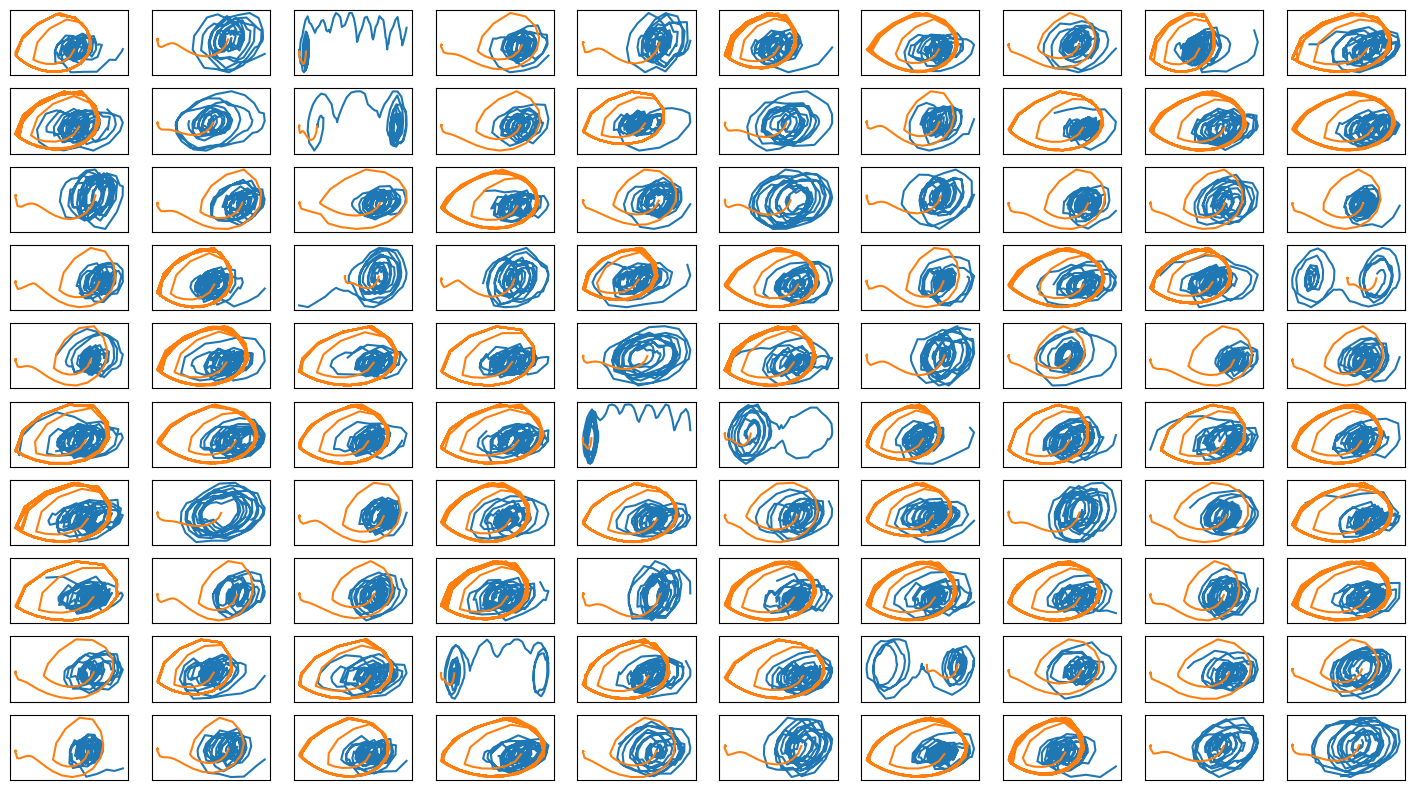

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 1090.55692  validloss 1869.74209±0.00000  bestvalidloss 1869.74209  last_update 0
train: iter 1  trainloss 504.95979  validloss 1862.98512±0.00000  bestvalidloss 1862.98512  last_update 0
train: iter 2  trainloss 445.69797  validloss 1129.15787±0.00000  bestvalidloss 1129.15787  last_update 0
train: iter 3  trainloss 382.46559  validloss 732.26113±0.00000  bestvalidloss 732.26113  last_update 0
train: iter 4  trainloss 320.44262  validloss 559.28115±0.00000  bestvalidloss 559.28115  last_update 0
train: iter 5  trainloss 233.71852  validloss 406.02809±0.00000  bestvalidloss 406.02809  last_update 0
train: iter 6  trainloss 137.17362  validloss 238.15432±0.00000  bestvalidloss 238.15432  last_update 0
train: iter 7  trainloss 30.39089  validloss 177.76667±0.00000  bestvalidloss 177.76667  last_update 0
train: iter 8  trainloss -52.02031  validloss 22.51880±0.00000  bestvalidloss 22.51880  last_update 0
train: iter 9  trainloss -119.99213  vali

train: iter 77  trainloss -569.26772  validloss -555.62862±0.00000  bestvalidloss -579.08776  last_update 4
train: iter 78  trainloss -654.83968  validloss -373.41568±0.00000  bestvalidloss -579.08776  last_update 5
train: iter 79  trainloss -653.86573  validloss -568.79120±0.00000  bestvalidloss -579.08776  last_update 6
train: iter 80  trainloss -643.47469  validloss -564.81323±0.00000  bestvalidloss -579.08776  last_update 7
train: iter 81  trainloss -618.68182  validloss -521.24231±0.00000  bestvalidloss -579.08776  last_update 8
train: iter 82  trainloss -650.60602  validloss -513.55716±0.00000  bestvalidloss -579.08776  last_update 9
train: iter 83  trainloss -534.24870  validloss -571.95924±0.00000  bestvalidloss -579.08776  last_update 10
train: iter 84  trainloss -658.90771  validloss -511.40795±0.00000  bestvalidloss -579.08776  last_update 11
train: iter 85  trainloss -654.87555  validloss -594.27779±0.00000  bestvalidloss -594.27779  last_update 0
train: iter 86  trainloss 

train: iter 154  trainloss -717.39088  validloss -606.65219±0.00000  bestvalidloss -651.02371  last_update 5
train: iter 155  trainloss -729.19680  validloss -634.26477±0.00000  bestvalidloss -651.02371  last_update 6
train: iter 156  trainloss -657.02113  validloss -609.87986±0.00000  bestvalidloss -651.02371  last_update 7
train: iter 157  trainloss -708.51377  validloss -568.29581±0.00000  bestvalidloss -651.02371  last_update 8
train: iter 158  trainloss -724.74690  validloss -621.40164±0.00000  bestvalidloss -651.02371  last_update 9
train: iter 159  trainloss -707.14068  validloss -601.63651±0.00000  bestvalidloss -651.02371  last_update 10
train: iter 160  trainloss -719.50894  validloss -598.13943±0.00000  bestvalidloss -651.02371  last_update 11
train: iter 161  trainloss -674.17835  validloss -350.02885±0.00000  bestvalidloss -651.02371  last_update 12
train: iter 162  trainloss -524.49034  validloss -638.82704±0.00000  bestvalidloss -651.02371  last_update 13
train: iter 163

train: iter 229  trainloss -710.97211  validloss -664.18308±0.00000  bestvalidloss -688.31596  last_update 14
train: iter 230  trainloss -730.01240  validloss -635.68368±0.00000  bestvalidloss -688.31596  last_update 15
train: iter 231  trainloss -741.89859  validloss -668.95136±0.00000  bestvalidloss -688.31596  last_update 16
train: iter 232  trainloss -710.85890  validloss -594.70839±0.00000  bestvalidloss -688.31596  last_update 17
train: iter 233  trainloss -717.68627  validloss -626.62981±0.00000  bestvalidloss -688.31596  last_update 18
train: iter 234  trainloss -723.99781  validloss -688.38843±0.00000  bestvalidloss -688.38843  last_update 0
train: iter 235  trainloss -735.46114  validloss -640.90411±0.00000  bestvalidloss -688.38843  last_update 1
train: iter 236  trainloss -737.51831  validloss -650.52796±0.00000  bestvalidloss -688.38843  last_update 2
train: iter 237  trainloss -740.79243  validloss -663.05749±0.00000  bestvalidloss -688.38843  last_update 3
train: iter 23

train: iter 305  trainloss -742.50171  validloss -676.02688±0.00000  bestvalidloss -700.95679  last_update 9
train: iter 306  trainloss -747.41514  validloss -673.94844±0.00000  bestvalidloss -700.95679  last_update 10
train: iter 307  trainloss -752.18147  validloss -683.86187±0.00000  bestvalidloss -700.95679  last_update 11
train: iter 308  trainloss -731.25679  validloss -693.12758±0.00000  bestvalidloss -700.95679  last_update 12
train: iter 309  trainloss -754.67242  validloss -667.21675±0.00000  bestvalidloss -700.95679  last_update 13
train: iter 310  trainloss -745.29802  validloss -687.47645±0.00000  bestvalidloss -700.95679  last_update 14
train: iter 311  trainloss -761.01464  validloss -690.86617±0.00000  bestvalidloss -700.95679  last_update 15
train: iter 312  trainloss -752.77441  validloss -675.43978±0.00000  bestvalidloss -700.95679  last_update 16
train: iter 313  trainloss -750.78089  validloss -679.73821±0.00000  bestvalidloss -700.95679  last_update 17
train: iter

train: iter 380  trainloss -765.88197  validloss -639.99828±0.00000  bestvalidloss -713.73388  last_update 44
train: iter 381  trainloss -753.58894  validloss -704.90018±0.00000  bestvalidloss -713.73388  last_update 45
train: iter 382  trainloss -745.28600  validloss -695.73450±0.00000  bestvalidloss -713.73388  last_update 46
train: iter 383  trainloss -719.83138  validloss -679.74094±0.00000  bestvalidloss -713.73388  last_update 47
train: iter 384  trainloss -756.08666  validloss -701.70523±0.00000  bestvalidloss -713.73388  last_update 48
train: iter 385  trainloss -754.02006  validloss -666.64271±0.00000  bestvalidloss -713.73388  last_update 49
train: iter 386  trainloss -743.77237  validloss -696.35396±0.00000  bestvalidloss -713.73388  last_update 50
train: iter 387  trainloss -767.06969  validloss -684.24277±0.00000  bestvalidloss -713.73388  last_update 51
train: iter 388  trainloss -725.71866  validloss -692.75502±0.00000  bestvalidloss -713.73388  last_update 52
train: ite

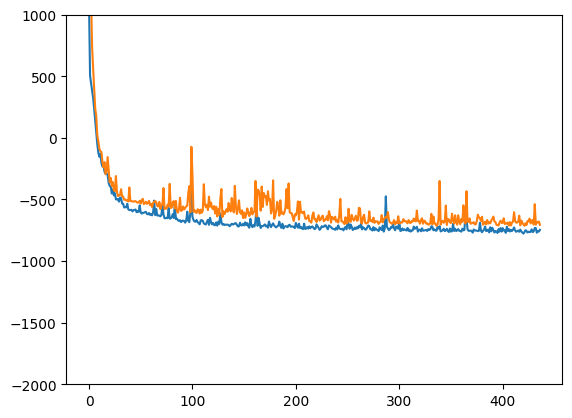

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


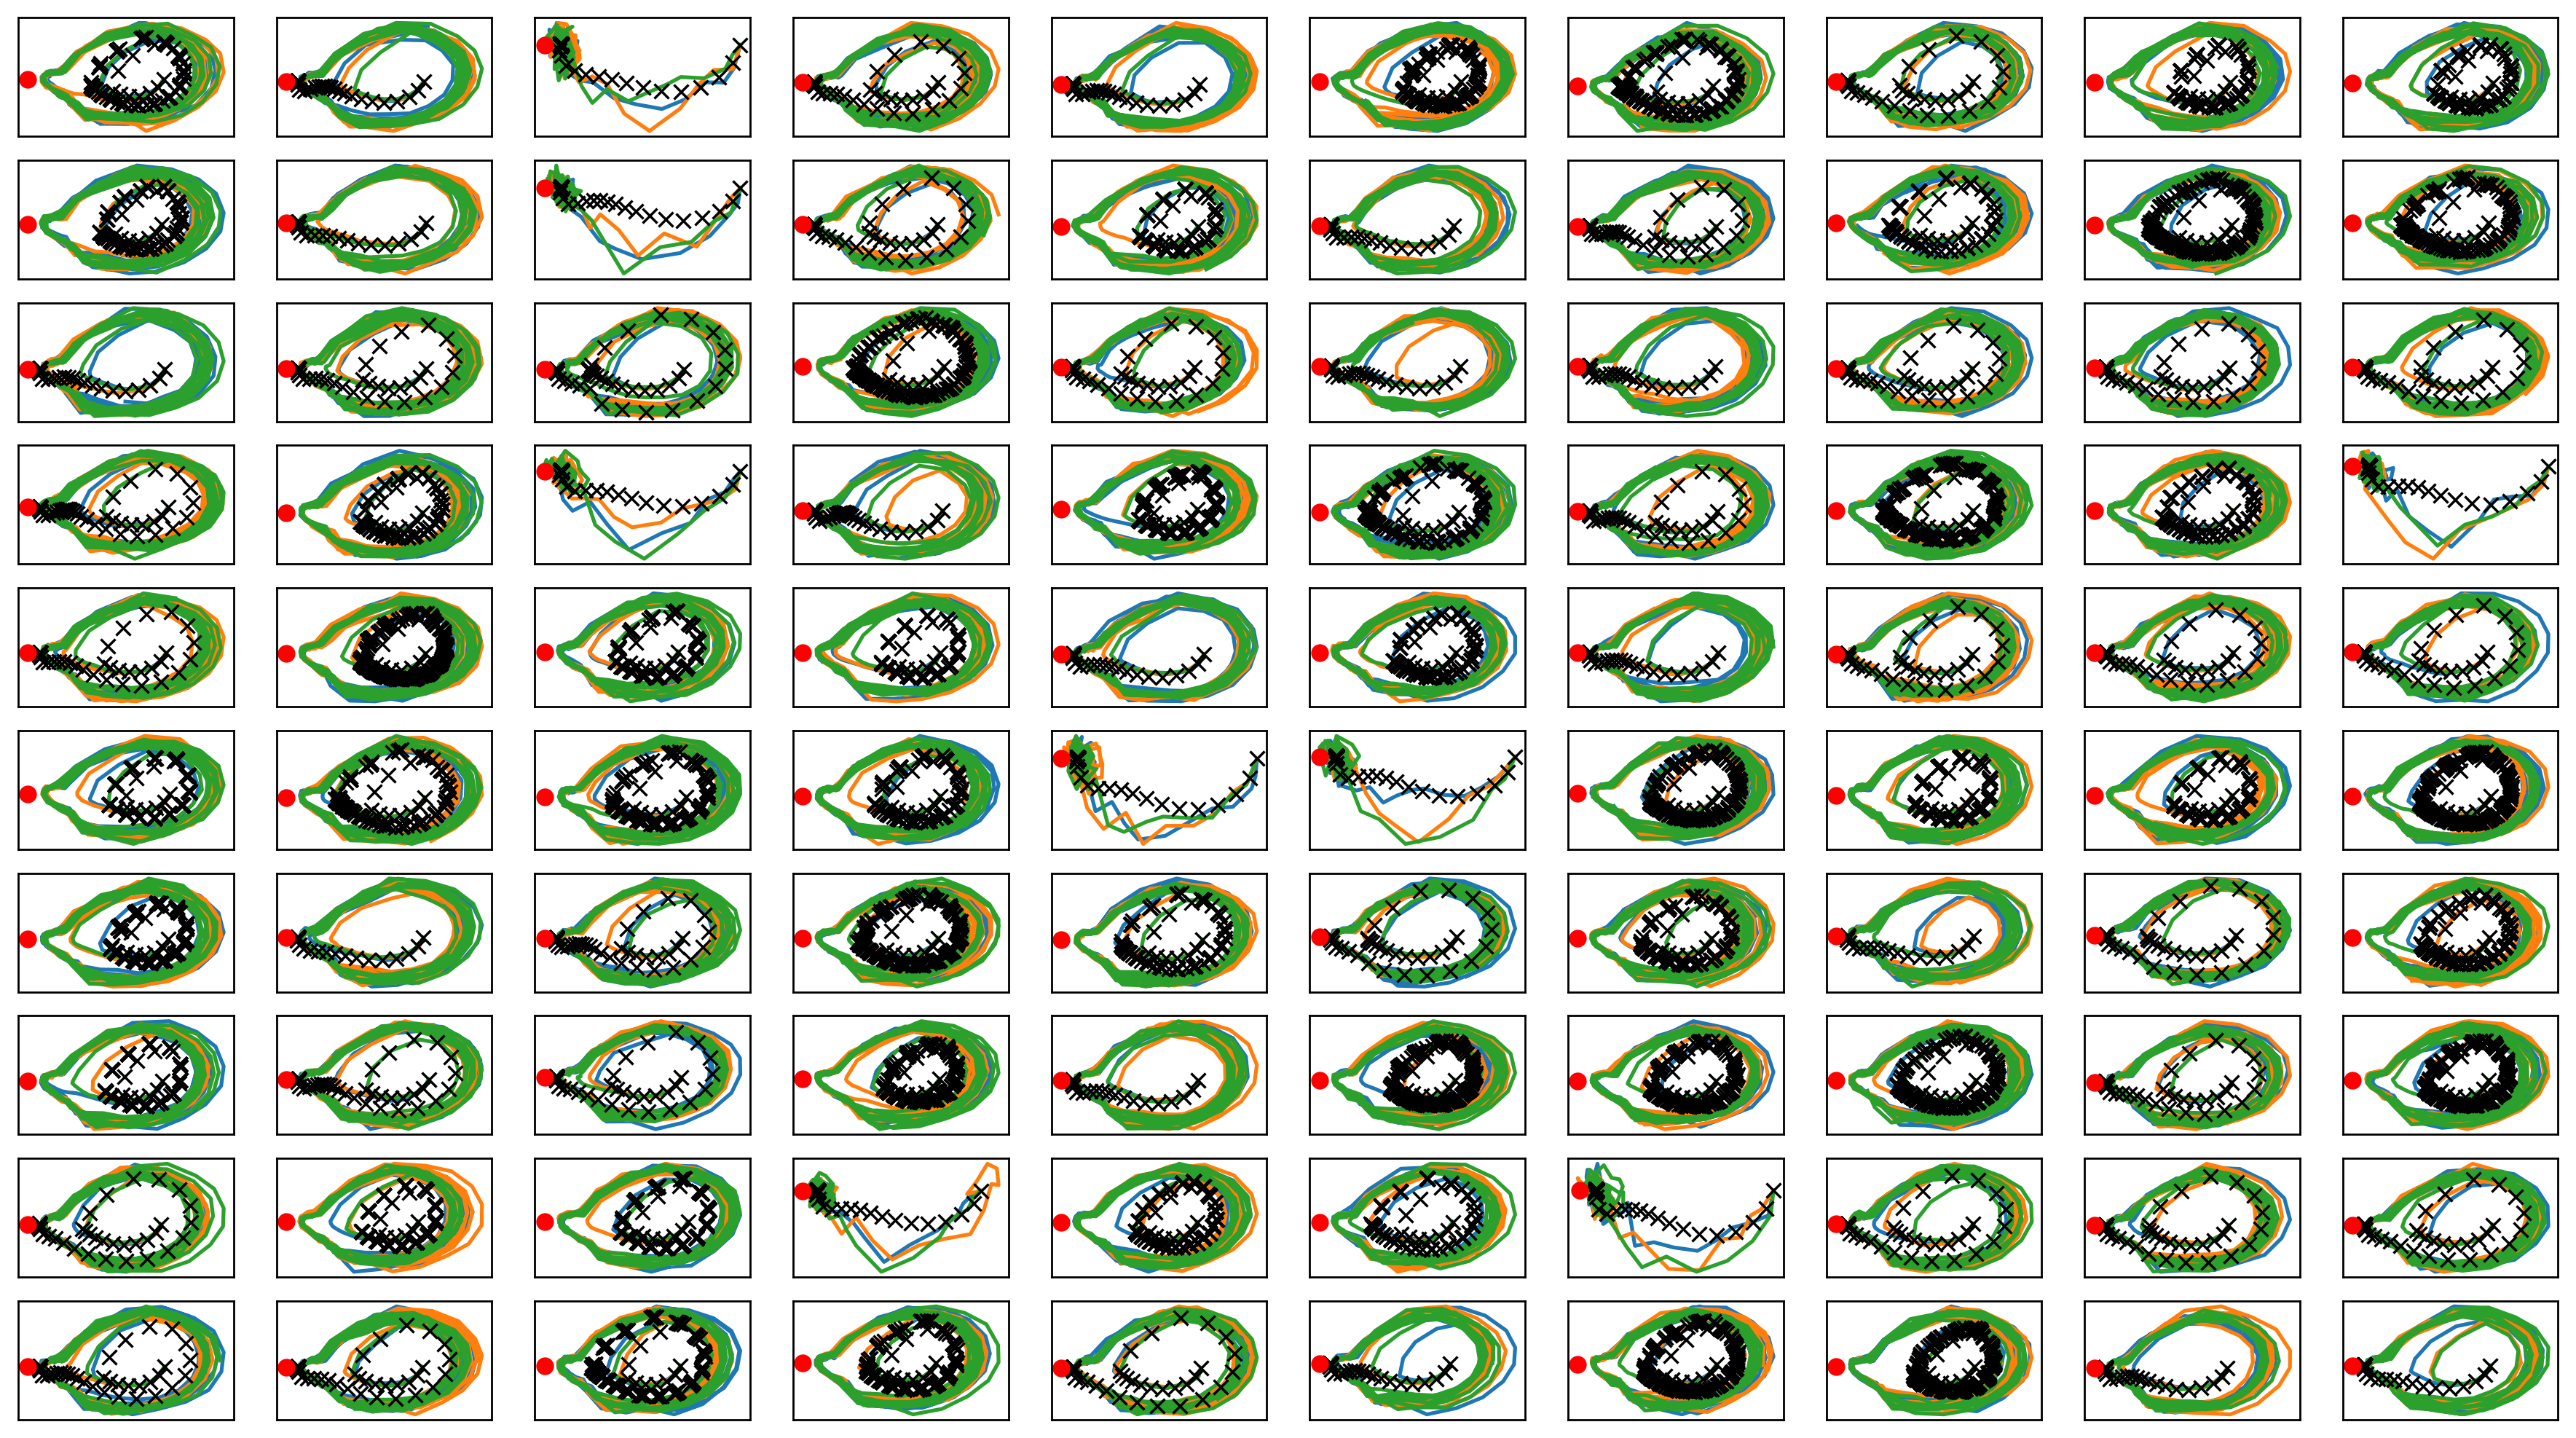

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

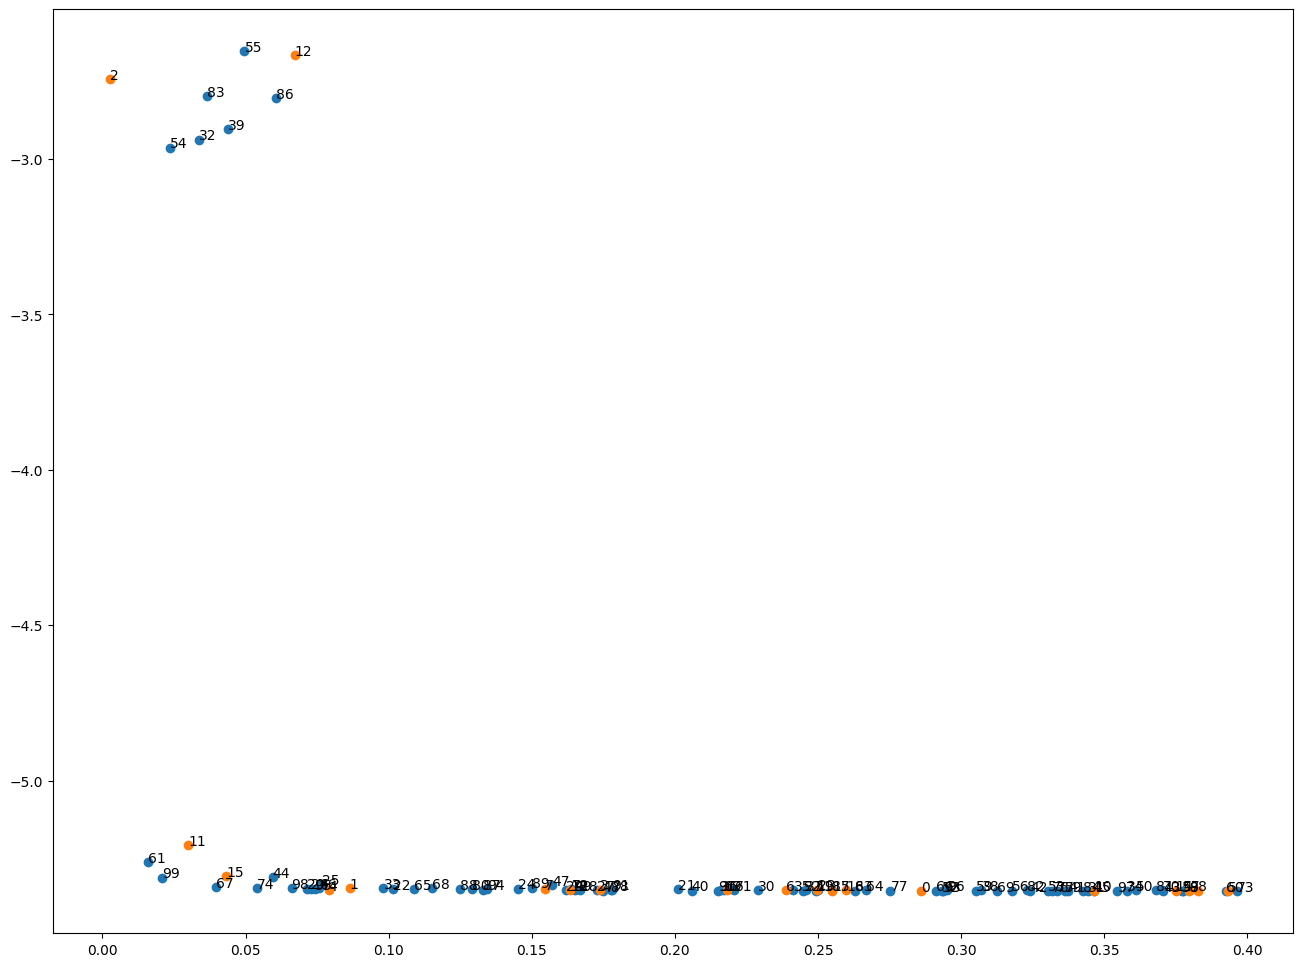

[0.2859264  0.0864358  0.0024921  0.17391661 0.07907403 0.39336027
 0.23893358 0.15462851 0.38266119 0.37959092 0.34651572 0.02997943
 0.06718887 0.16337754 0.37502863 0.04327735 0.21808106 0.2550441
 0.25992204 0.24956645 0.07158956 0.20101322 0.10147186 0.24997234
 0.14514144 0.07657856 0.07297816 0.17272883 0.16671052 0.16193009
 0.22885551 0.34440572 0.03386464 0.09818148 0.35786052 0.2414254
 0.21602989 0.24582514 0.30710321 0.04392725 0.20586148 0.3374828
 0.32405777 0.37068828 0.05949074 0.34630997 0.0756103  0.15711247
 0.17470652 0.16498888 0.36096874 0.24942754 0.29319949 0.33040915
 0.02355204 0.04960585 0.31776933 0.377519   0.37703434 0.30519746
 0.39248397 0.01603645 0.21731613 0.26299385 0.26662336 0.10898858
 0.29130778 0.03973111 0.11521473 0.31261245 0.37032344 0.22077058
 0.16383656 0.39631873 0.05390104 0.33351255 0.33176718 0.27528851
 0.17781627 0.33618643 0.12902999 0.36799494 0.32301958 0.03636422
 0.34247351 0.25473947 0.06075424 0.13299807 0.12488201 0.1501360

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


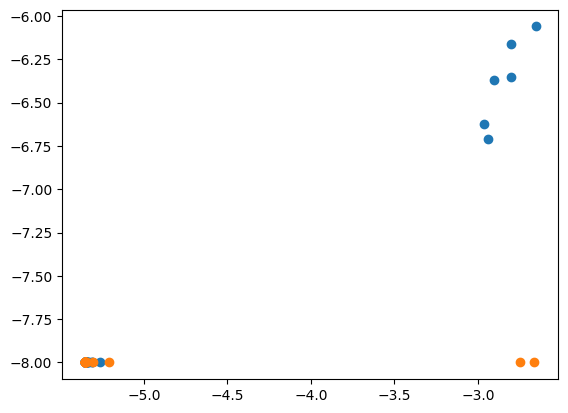

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 13.78660  validloss 14.14785±0.00000  bestvalidloss 14.14785  last_update 0
train: iter 1  trainloss 12.53919  validloss 12.81190±0.00000  bestvalidloss 12.81190  last_update 0
train: iter 2  trainloss 11.49413  validloss 11.73033±0.00000  bestvalidloss 11.73033  last_update 0
train: iter 3  trainloss 10.54706  validloss 10.77079±0.00000  bestvalidloss 10.77079  last_update 0
train: iter 4  trainloss 9.75745  validloss 9.90806±0.00000  bestvalidloss 9.90806  last_update 0
train: iter 5  trainloss 9.05429  validloss 9.18596±0.00000  bestvalidloss 9.18596  last_update 0
train: iter 6  trainloss 8.43727  validloss 8.56758±0.00000  bestvalidloss 8.56758  last_update 0
train: iter 7  trainloss 7.89718  validloss 7.97064±0.00000  bestvalidloss 7.97064  last_update 0
train: iter 8  trainloss 7.41176  validloss 7.46590±0.00000  bestvalidloss 7.46590  last_update 0
train: iter 9  trainloss 6.97401  validloss 7.04342±0.00000  bestvalidloss 7.04342  last_update 0
train: i

train: iter 88  trainloss 1.65271  validloss 1.68097±0.00000  bestvalidloss 1.68097  last_update 0
train: iter 89  trainloss 1.61942  validloss 1.64927±0.00000  bestvalidloss 1.64927  last_update 0
train: iter 90  trainloss 1.58589  validloss 1.61641±0.00000  bestvalidloss 1.61641  last_update 0
train: iter 91  trainloss 1.55015  validloss 1.58468±0.00000  bestvalidloss 1.58468  last_update 0
train: iter 92  trainloss 1.51538  validloss 1.54920±0.00000  bestvalidloss 1.54920  last_update 0
train: iter 93  trainloss 1.47833  validloss 1.52145±0.00000  bestvalidloss 1.52145  last_update 0
train: iter 94  trainloss 1.44365  validloss 1.48837±0.00000  bestvalidloss 1.48837  last_update 0
train: iter 95  trainloss 1.41091  validloss 1.45548±0.00000  bestvalidloss 1.45548  last_update 0
train: iter 96  trainloss 1.37684  validloss 1.43136±0.00000  bestvalidloss 1.43136  last_update 0
train: iter 97  trainloss 1.34440  validloss 1.40067±0.00000  bestvalidloss 1.40067  last_update 0
train: ite

train: iter 176  trainloss 1.00723  validloss 1.20924±0.00000  bestvalidloss 1.17540  last_update 53
train: iter 177  trainloss 1.00676  validloss 1.22000±0.00000  bestvalidloss 1.17540  last_update 54
train: iter 178  trainloss 1.01066  validloss 1.21973±0.00000  bestvalidloss 1.17540  last_update 55
train: iter 179  trainloss 1.00944  validloss 1.21268±0.00000  bestvalidloss 1.17540  last_update 56
train: iter 180  trainloss 1.02121  validloss 1.21878±0.00000  bestvalidloss 1.17540  last_update 57
train: iter 181  trainloss 0.98992  validloss 1.22477±0.00000  bestvalidloss 1.17540  last_update 58
train: iter 182  trainloss 0.99849  validloss 1.22210±0.00000  bestvalidloss 1.17540  last_update 59
train: iter 183  trainloss 0.99819  validloss 1.20819±0.00000  bestvalidloss 1.17540  last_update 60
train: iter 184  trainloss 1.00633  validloss 1.20917±0.00000  bestvalidloss 1.17540  last_update 61
train: iter 185  trainloss 1.00680  validloss 1.21397±0.00000  bestvalidloss 1.17540  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-5.1542, -0.4426], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 16.02096  validloss 27.45117±0.00000  bestvalidloss 27.45117  last_update 0
train: iter 1  trainloss 8.48815  validloss 21.71857±0.00000  bestvalidloss 21.71857  last_update 0
train: iter 2  trainloss 4.35662  validloss 14.15223±0.00000  bestvalidloss 14.15223  last_update 0
train: iter 3  trainloss 2.96955  validloss 13.43491±0.00000  bestvalidloss 13.43491  last_update 0
train: iter 4  trainloss 2.44438  validloss 12.91013±0.00000  bestvalidloss 12.91013  last_update 0
train: iter 5  trainloss 2.27081  validloss 12.37191±0.00000  bestvalidloss 12.37191  last_update 0
train: iter 6  trainloss 2.15463  validloss 12.07924±0.00000  bestvalidloss 12.07924  last_update 0
train: iter 7  trainloss 2.09501  validloss 11.37295±0.00000  bestvalidloss 11.37295  last_update 0
train: iter 8  trainloss 1.98910  validloss 11.58515±0.00000  bestvalidloss 11.37295  last_update 1
train: iter 9  trainloss 1.95310  validloss 11.62126±0.00000  bestvalidloss 11.37295  last_update 2

train: iter 83  trainloss 1.22607  validloss 11.17952±0.00000  bestvalidloss 9.78744  last_update 24
train: iter 84  trainloss 1.19917  validloss 11.58581±0.00000  bestvalidloss 9.78744  last_update 25
train: iter 85  trainloss 1.22644  validloss 10.89506±0.00000  bestvalidloss 9.78744  last_update 26
train: iter 86  trainloss 1.19127  validloss 10.52502±0.00000  bestvalidloss 9.78744  last_update 27
train: iter 87  trainloss 1.25578  validloss 11.08635±0.00000  bestvalidloss 9.78744  last_update 28
train: iter 88  trainloss 1.20333  validloss 11.43539±0.00000  bestvalidloss 9.78744  last_update 29
train: iter 89  trainloss 1.20058  validloss 10.58138±0.00000  bestvalidloss 9.78744  last_update 30
train: iter 90  trainloss 1.21106  validloss 10.46938±0.00000  bestvalidloss 9.78744  last_update 31
train: iter 91  trainloss 1.20759  validloss 11.12767±0.00000  bestvalidloss 9.78744  last_update 32
train: iter 92  trainloss 1.22824  validloss 11.07916±0.00000  bestvalidloss 9.78744  last_

train: iter 165  trainloss 1.19028  validloss 11.33814±0.00000  bestvalidloss 9.69468  last_update 52
train: iter 166  trainloss 1.20991  validloss 11.01380±0.00000  bestvalidloss 9.69468  last_update 53
train: iter 167  trainloss 1.18341  validloss 9.67029±0.00000  bestvalidloss 9.67029  last_update 0
train: iter 168  trainloss 1.22405  validloss 9.23715±0.00000  bestvalidloss 9.23715  last_update 0
train: iter 169  trainloss 1.19270  validloss 8.96085±0.00000  bestvalidloss 8.96085  last_update 0
train: iter 170  trainloss 1.17586  validloss 10.94854±0.00000  bestvalidloss 8.96085  last_update 1
train: iter 171  trainloss 1.19085  validloss 10.41067±0.00000  bestvalidloss 8.96085  last_update 2
train: iter 172  trainloss 1.18599  validloss 10.96610±0.00000  bestvalidloss 8.96085  last_update 3
train: iter 173  trainloss 1.20240  validloss 11.18055±0.00000  bestvalidloss 8.96085  last_update 4
train: iter 174  trainloss 1.21599  validloss 10.39798±0.00000  bestvalidloss 8.96085  last_

train: iter 246  trainloss 1.20175  validloss 11.23220±0.00000  bestvalidloss 8.96085  last_update 77
train: iter 247  trainloss 1.21361  validloss 10.14067±0.00000  bestvalidloss 8.96085  last_update 78
train: iter 248  trainloss 1.20709  validloss 10.59213±0.00000  bestvalidloss 8.96085  last_update 79
train: iter 249  trainloss 1.21653  validloss 10.36110±0.00000  bestvalidloss 8.96085  last_update 80
train: iter 250  trainloss 1.20227  validloss 10.50083±0.00000  bestvalidloss 8.96085  last_update 81
train: iter 251  trainloss 1.19032  validloss 10.56849±0.00000  bestvalidloss 8.96085  last_update 82
train: iter 252  trainloss 1.20936  validloss 11.27096±0.00000  bestvalidloss 8.96085  last_update 83
train: iter 253  trainloss 1.19836  validloss 9.93522±0.00000  bestvalidloss 8.96085  last_update 84
train: iter 254  trainloss 1.21254  validloss 9.87123±0.00000  bestvalidloss 8.96085  last_update 85
train: iter 255  trainloss 1.21399  validloss 10.01949±0.00000  bestvalidloss 8.9608

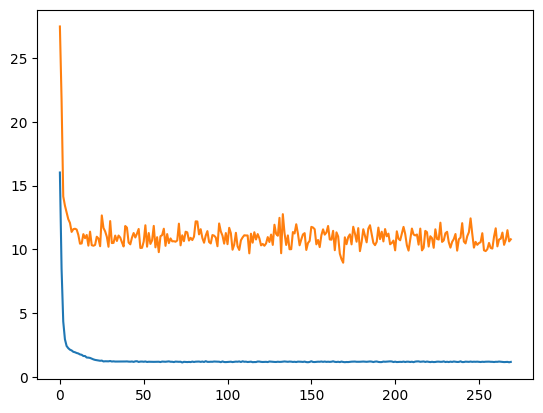

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-5.5968)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.4496)


In [21]:
print(vi.h_min_tilde)

-5.584961


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.5695324555314594
tensor([0.6717])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

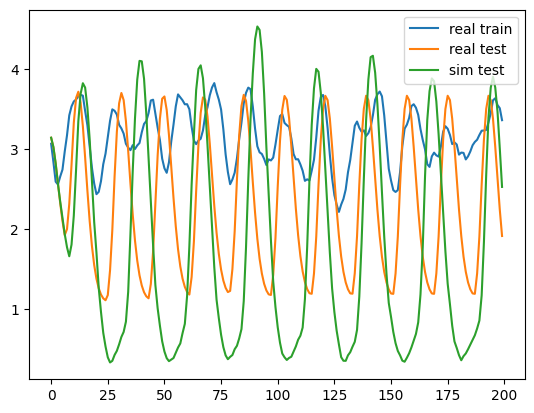

encoder [-5.351517 -8.      ]
initial_belief tensor([-5.1542, -0.4426])
real train tensor([-5.3588, -8.0009])
real test tensor([-5.3608, -8.0029])
sim tensor([-5.3628, -8.0049])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-5.0


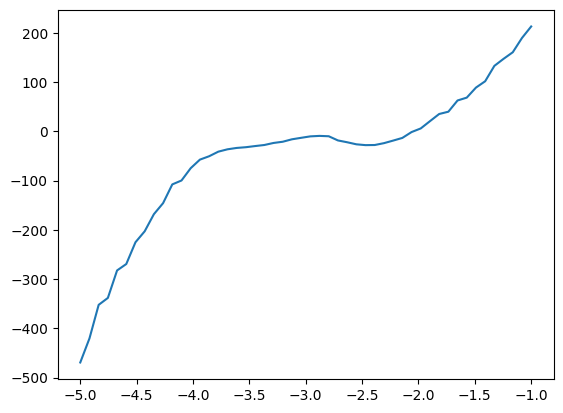

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.8911823860140026
tensor([1.7638])
